---
### 의사결정나무
- 데이터 분류 및 회귀에 사용되는 지도학습 알고리즘 <br><br>
- 장점 : 대소를 구분하는 것이므로 표준화를 할 필요가 없다. : 유일하다. <br><br> 
- 단점 : 모라 했는데 까먹음 <br><br>

### 문제정의
- 서울 지역(구)의 경도와 위도 정보를 사용하여 임의의 입력된 지역(동)을 강남, 강북, 강동, 강서로 분류

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('../Data/seoul_district.csv')
train_df.head()

,district,longitude,latitude,label
0,강서구,126.849500,37.551000,강서
1,양천구,126.855396,37.524240,강서
2,구로구,126.887400,37.495400,강서
3,금천구,126.902000,37.451900,강서
4,마포구,126.908728,37.560229,강서


In [3]:
test_df = pd.read_csv('../Data/seoul_dong.csv')
test_df.head()

,dong,longitude,latitude,label
0,개봉동,126.854547,37.489853,강서
1,고척동,126.859245,37.501394,강서
2,화곡동,126.847951,37.537759,강서
3,방화동,126.815719,37.575817,강서
4,상암동,126.891620,37.577039,강서


In [6]:
# 레이블의 갯수 확인
train_df['label'].value_counts()

강서    5
강남    5
강북    5
강동    5
Name: label, dtype: int64

In [7]:
# 레이블의 갯수 확인
test_df['label'].value_counts()

강서    5
강남    5
강북    5
강동    5
Name: label, dtype: int64

In [8]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

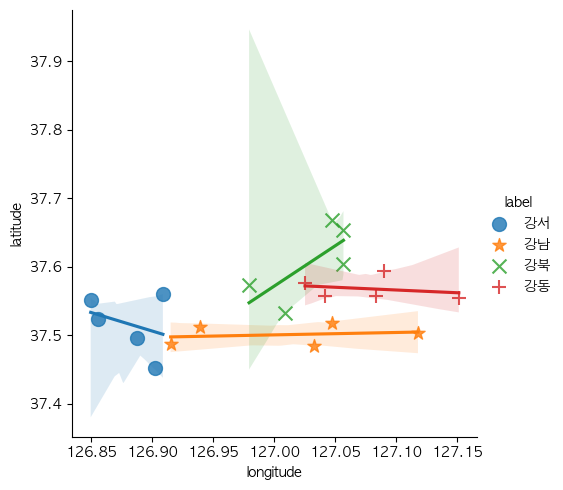

In [15]:
sns.lmplot(
    x='longitude',
    y='latitude',
    data=train_df,
    hue='label',
    markers=['o','*','x','+'],
    scatter_kws={'s':100},
    fit_reg=True
)

### 데이터 다듬기

In [17]:
del train_df['district']
del test_df['dong']

In [20]:
train_df.head()

,longitude,latitude,label
0,126.849500,37.551000,강서
1,126.855396,37.524240,강서
2,126.887400,37.495400,강서
3,126.902000,37.451900,강서
4,126.908728,37.560229,강서


In [21]:
test_df.head()

,longitude,latitude,label
0,126.854547,37.489853,강서
1,126.859245,37.501394,강서
2,126.847951,37.537759,강서
3,126.815719,37.575817,강서
4,126.891620,37.577039,강서


### 의사결정나무로 학습시키기

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
X_train = train_df.iloc[:,:2]
y_train = train_df.iloc[:,2]

X_test = test_df.iloc[:,:2]
y_test = test_df.iloc[:,2]

In [25]:
clf=DecisionTreeClassifier(random_state=35)

clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.95

- gini : 불순도 <br><br>
- 불순도가 0이 될 때 까지 나눈다. <br><br>
- gini 구하는 방법 : 내가 이걸 골랐을 때 아닐 확률을 각 라벨마다 구한 후에 그것의 조화평균 값이 gini이다.

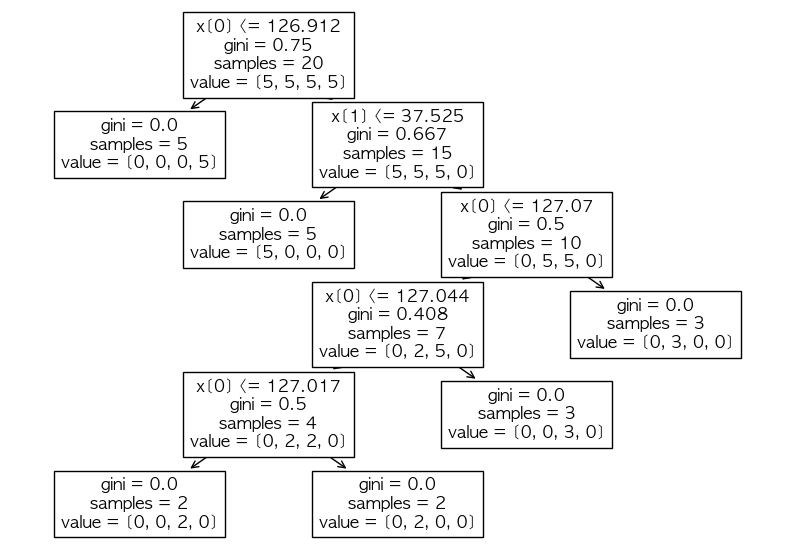

In [26]:
# 어떻게 결정하는지 트리를 보기 위해서
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))

plot_tree(clf)

plt.show()

In [27]:
train_df

,longitude,latitude,label
0,126.849500,37.551000,강서
1,126.855396,37.524240,강서
2,126.887400,37.495400,강서
3,126.902000,37.451900,강서
4,126.908728,37.560229,강서
5,126.915065,37.487517,강남
6,126.939300,37.512400,강남
7,127.032400,37.483700,강남
8,127.047300,37.517200,강남
9,127.117898,37.503510,강남


In [34]:
import numpy as np
list = np.array([2/7 , 5/7])
np.mean(list)

0.5

In [35]:
(2 * 2/7 * 5/7 ) / (1)

0.4081632653061224